# Outlier detection using rolling statistics

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
df = yf.download("TSLA",
                 start="2019-01-01",
                 end="2020-12-31",
                 progress=False)
df['rtn'] = df['Adj Close'].pct_change()
df = df[['rtn']].copy()

,rtn
Date,
2019-01-02,NaN
2019-01-03,-0.031472
2019-01-04,0.057697
2019-01-07,0.054361
2019-01-08,0.001164
...,...
2020-12-23,0.008808
2020-12-24,0.024443
2020-12-28,0.002901


In [3]:
df_rolling = df[['rtn']].rolling(window=21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [4]:
df = df.join(df_rolling)

In [5]:
N_SIGMAS = 3
df['upper'] = df['mean'] + N_SIGMAS * df['std']
df['lower'] = df['mean'] - N_SIGMAS * df['std']

In [6]:
df['outlier'] = (
    (df['rtn'] > df['upper']) | (df['rtn'] < df['lower'])
)

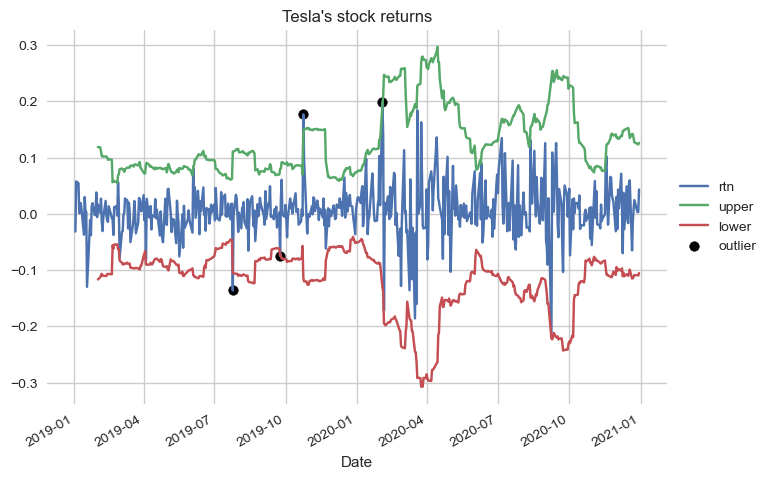

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, ax = plt.subplots()
df[['rtn', 'upper', 'lower']].plot(ax=ax)
ax.scatter(df.loc[df['outlier']].index, 
           df.loc[df['outlier'], 'rtn'],
           color='black', label='outlier')
ax.set_title("Tesla's stock returns")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
def identify_outliers(df, column, window_size, n_sigma):
    """Function for identifying outliers using rolling statistics"""

    df = df[[column]].copy()
    df_rolling = df[[column]].rolling(window=window_size).agg(['mean', 'std'])
    df_rolling.columns = df_rolling.columns.droplevel()

    df = df.join(df_rolling)
    df['upper'] = df['mean'] + n_sigma * df['std']
    df['lower'] = df['mean'] - n_sigma * df['std']

    return ((df[column] > df['upper']) | (df[column] < df['lower']))

# Outlier detection with the Hampel filter